<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/CustomCallbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [25]:
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []

  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get('loss'))

  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label='losses per batch')
    plt.xlabel(f'batches epoch{epoch}')
    plt.ylabel(f'loss')
    plt.legend()
    plt.show();
    self.per_batch_losses = []

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation='softmax')(features)

  model = keras.Model(inputs, outputs)
  return model

In [28]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60_000, 28 * 28)).astype('float32') / 255.0
test_images = test_images.reshape((10_000, 28 * 28)).astype('float32') / 255.0

train_images, val_images = images[10_000:], images[:10_000]
train_labels, val_labels = labels[10_000:], labels[:10_000]

In [29]:
model = get_mnist_model()

In [30]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.2967 - accuracy: 0.9123

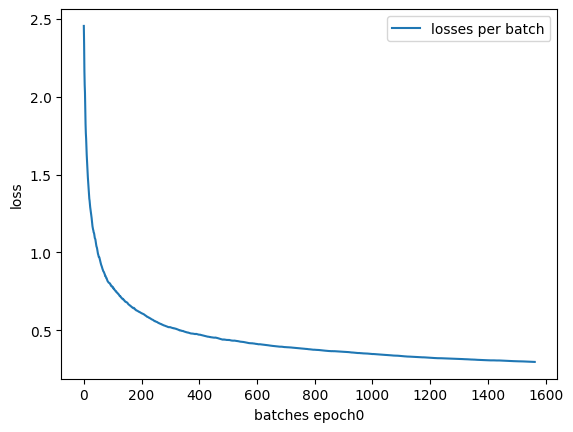

1563/1563 [==============================] - 12s 7ms/step - loss: 0.2966 - accuracy: 0.9123 - val_loss: 0.1422 - val_accuracy: 0.9596
Epoch 2/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9546

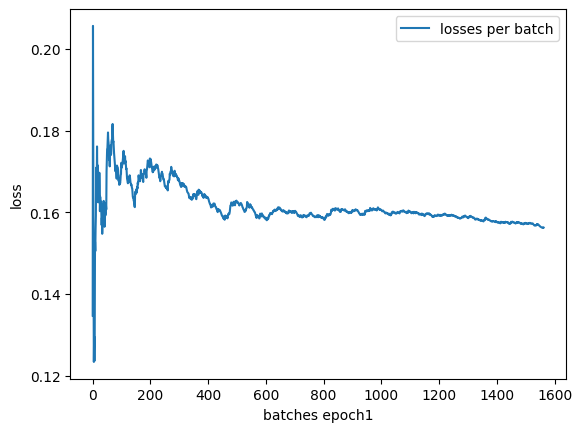

1563/1563 [==============================] - 11s 7ms/step - loss: 0.1563 - accuracy: 0.9546 - val_loss: 0.1129 - val_accuracy: 0.9675
Epoch 3/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.1260 - accuracy: 0.9644

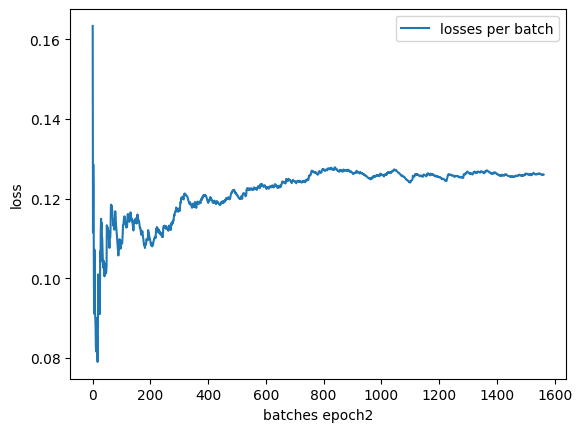

1563/1563 [==============================] - 12s 8ms/step - loss: 0.1260 - accuracy: 0.9643 - val_loss: 0.1011 - val_accuracy: 0.9730
Epoch 4/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.1125 - accuracy: 0.9689

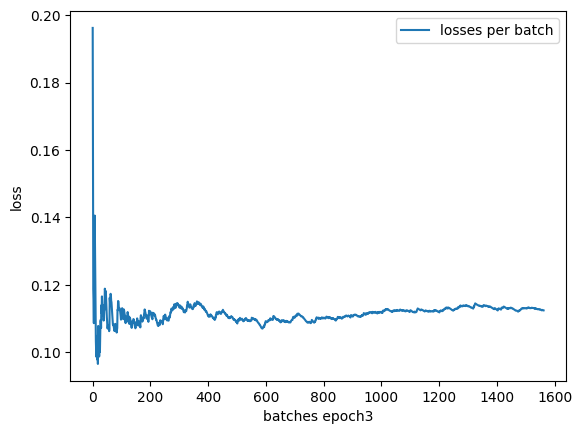

1563/1563 [==============================] - 12s 7ms/step - loss: 0.1124 - accuracy: 0.9690 - val_loss: 0.0982 - val_accuracy: 0.9744
Epoch 5/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9717

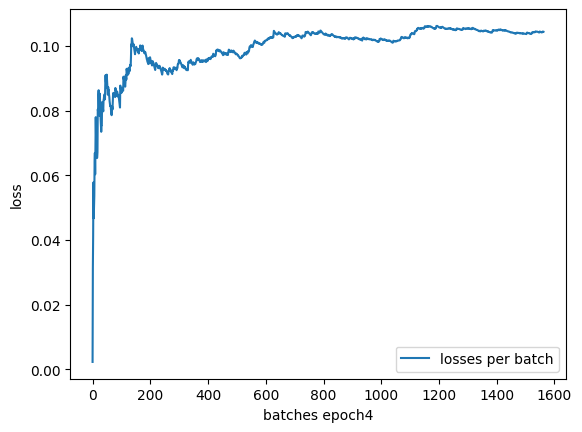

1563/1563 [==============================] - 11s 7ms/step - loss: 0.1044 - accuracy: 0.9717 - val_loss: 0.0946 - val_accuracy: 0.9758
Epoch 6/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.0928 - accuracy: 0.9748

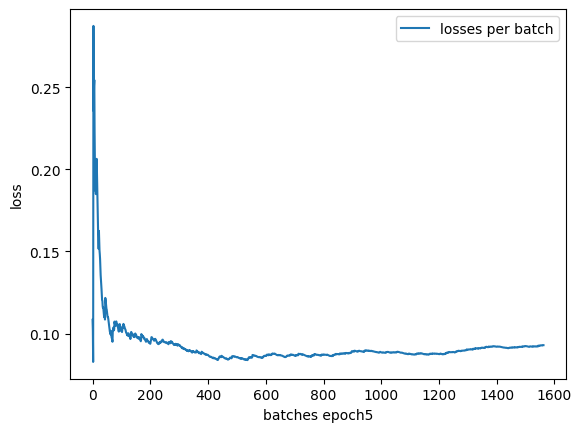

1563/1563 [==============================] - 12s 8ms/step - loss: 0.0929 - accuracy: 0.9748 - val_loss: 0.0906 - val_accuracy: 0.9763
Epoch 7/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.0878 - accuracy: 0.9761

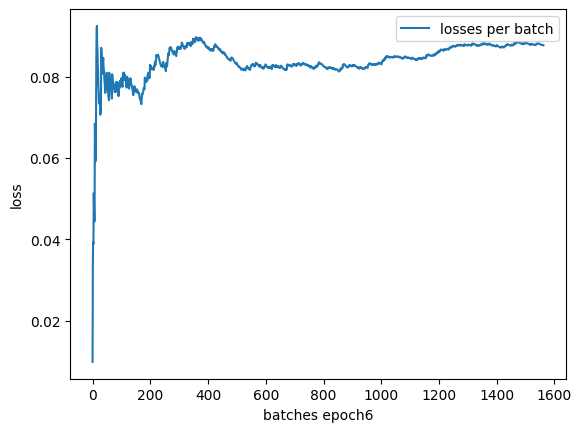

1563/1563 [==============================] - 13s 8ms/step - loss: 0.0877 - accuracy: 0.9761 - val_loss: 0.0883 - val_accuracy: 0.9785
Epoch 8/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9775

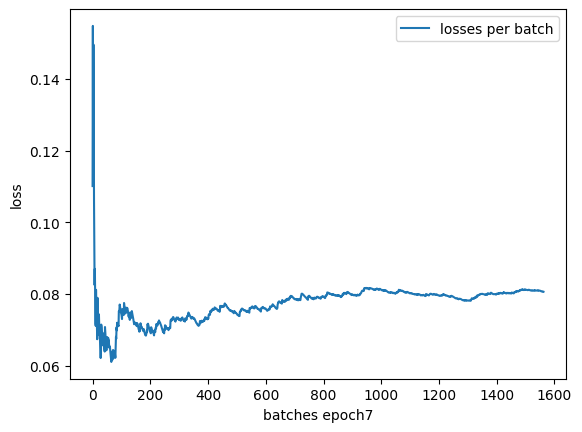

1563/1563 [==============================] - 13s 8ms/step - loss: 0.0807 - accuracy: 0.9775 - val_loss: 0.0918 - val_accuracy: 0.9788
Epoch 9/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9790

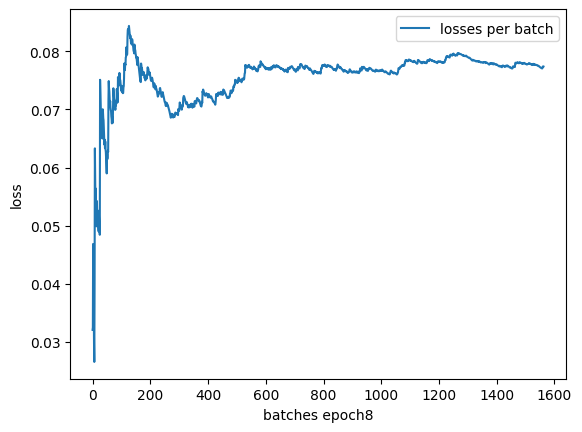

1563/1563 [==============================] - 13s 8ms/step - loss: 0.0774 - accuracy: 0.9789 - val_loss: 0.0939 - val_accuracy: 0.9784
Epoch 10/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.0695 - accuracy: 0.9806

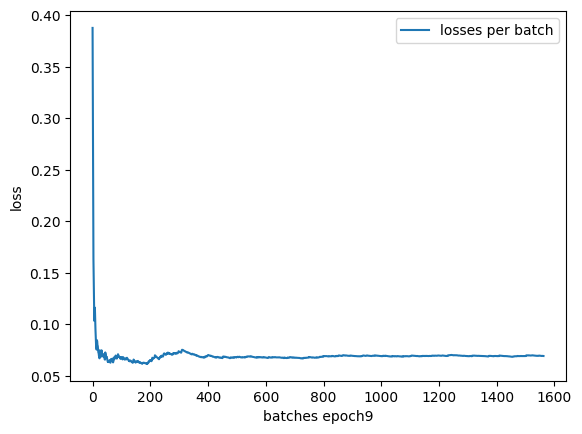

1563/1563 [==============================] - 13s 8ms/step - loss: 0.0694 - accuracy: 0.9806 - val_loss: 0.0993 - val_accuracy: 0.9794


In [31]:
model.fit(
    train_images, train_labels,
    epochs=10,
    callbacks=LossHistory(),
    validation_data=(val_images, val_labels)
)

In [32]:
# yeah, custom callbacks
# deep learning goes wild since now...